# Setup

In [2]:
# Imports
import collections
import os
import os.path as osp

import joblib
import numpy as np
import gym
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import pirl
from pirl import config, experiments

from analysis import common

In [3]:
# Config
experiments = [
    'few-jungle-9x9-Liquid-20180521_041300-ddc8132bb2a30ef149e3b567d84ccacd168e045c',
    'few-jungle-9x9-Water-20180521_041259-ddc8132bb2a30ef149e3b567d84ccacd168e045c',
    'few-jungle-9x9-Soda-20180521_041300-ddc8132bb2a30ef149e3b567d84ccacd168e045c',
]
experiments_dir = [osp.join('..', 'data', 'aws', 'experiments', x) for x in experiments]
figs_dir = osp.join('../../population-irl-paper', 'figs')

# Value difference

In [4]:
algo_pattern = '(.*)'
env_pattern = '.*-(.*)-v0'
dfs = [common.load_value(x, algo_pattern, env_pattern) for x in experiments_dir]
df = pd.concat(dfs)
values = common.aggregate_value(df, 1)

In [5]:
common.plot_ci(values)

mce                 mcec              mcep reg0           mcep reg1e-4          mcep reg1e-3         mcep reg1e-2         mcep reg1e-1  \
env    n    m   eval                                                                                                                                                                        
Liquid 1000 0   irl                        nan +/- nan    148.736 +/- 4.083     -172.434 +/- 9.658     -172.434 +/- 9.658    -172.434 +/- 9.658   -172.434 +/- 9.658   -172.434 +/- 9.658   
                value_iteration            nan +/- nan    359.594 +/- 0.151      -20.066 +/- 4.112      -20.066 +/- 4.112     -20.066 +/- 4.112    -20.066 +/- 4.112    -20.066 +/- 4.112   
            1   irl                 70.886 +/- 114.814    148.710 +/- 4.127     70.886 +/- 114.814     80.476 +/- 131.588    86.410 +/- 127.310   80.018 +/- 131.731   46.020 +/- 118.095   
                value_iteration   -248.540 +/- 327.185    359.594 +/- 0.151   -248.540 +/- 327.185   -292.908 +/- 278.197   -26.118 +/- 507.450    352.130 +/- 3.064    355.324 +/- 1.980   
            2   irl                  93.636 +/- 73.577    148.700 +/- 4.085      93.636 +/- 73.577      98.904 +/- 76.784    102.550 +/- 79.224    94.132 +/- 82.377    58.218 +/- 90.843   
                value_iteration   -337.116 +/- 242.820    359.594 +/- 0.151   -337.116 +/- 242.820   -248.240 +/- 381.736   107.992 +/- 277.820    354.016 +/- 3.335    356.104 +/- 3.553   
            5   irl                 110.508 +/- 46.836    148.660 +/- 4.031     110.508 +/- 46.836     112.216 +/- 47.996    112.344 +/- 50.171   106.626 +/- 50.491    79.156 +/- 51.544   
                value_iteration   -233.586 +/- 396.028    359.594 +/- 0.151   -233.586 +/- 396.028   -193.220 +/- 364.511   103.832 +/- 626.989    354.124 +/- 4.073    355.588 +/- 1.173   
            10  irl                 114.198 +/- 26.996    148.586 +/- 4.113     114.198 +/- 26.996     114.536 +/- 26.774    115.340 +/- 28.440   111.998 +/- 28.145    93.440 +/- 27.122   
                value_iteration   -226.674 +/- 389.013    359.566 +/- 0.183   -226.674 +/- 389.013   -150.058 +/- 524.865   107.080 +/- 316.101    354.468 +/- 7.528    356.666 +/- 3.746   
            20  irl                 123.638 +/- 18.451    148.510 +/- 4.214     123.638 +/- 18.451     123.668 +/- 18.401    123.816 +/- 18.099   121.954 +/- 16.049   108.812 +/- 15.739   
                value_iteration    -39.924 +/- 513.498    359.566 +/- 0.183    -39.924 +/- 513.498     10.420 +/- 557.803   290.880 +/- 234.953    353.936 +/- 2.680    356.340 +/- 4.583   
            50  irl                  128.920 +/- 5.937    148.268 +/- 4.038      128.920 +/- 5.937      128.746 +/- 6.018     128.336 +/- 5.743    127.630 +/- 4.940    120.730 +/- 5.497   
                value_iteration    208.840 +/- 347.499    359.566 +/- 0.183    208.840 +/- 347.499    216.790 +/- 331.847   280.974 +/- 297.535    355.914 +/- 3.525    358.190 +/- 2.544   
            100 irl                  133.296 +/- 6.009    148.024 +/- 3.863      133.296 +/- 6.009      133.224 +/- 5.933     132.866 +/- 5.451    132.162 +/- 4.583    128.000 +/- 5.006   
                value_iteration     56.202 +/- 285.167    359.708 +/- 0.195     56.202 +/- 285.167     57.714 +/- 290.998   197.234 +/- 361.824    358.988 +/- 2.837    357.862 +/- 2.103   
Soda   1000 0   irl                        nan +/- nan   -306.738 +/- 6.537     -449.356 +/- 1.364     -449.356 +/- 1.364    -449.356 +/- 1.364   -449.356 +/- 1.364   -449.356 +/- 1.364   
                value_iteration            nan +/- nan  -462.988 +/- 12.158     -475.326 +/- 0.644     -475.326 +/- 0.644    -475.326 +/- 0.644   -475.326 +/- 0.644   -475.326 +/- 0.644   
            1   irl                 82.892 +/- 124.139   -306.532 +/- 6.556     82.892 +/- 124.139     89.982 +/- 130.153    96.570 +/- 138.506   91.074 +/- 135.641   37.202 +/- 121.235   
                value_iteration   -325.564 +/- 311.456  -466.772 +/- 13.982   -325

# Policy rollout

In [ ]:
def expert_cached_value(rl, env_name, pol_discount=0.99, eval_discount=1.00, seed=1234, episodes=100):
    '''Rollout a cached expert policy for episodes.
       WARNING: This will be slow or just break if policy is not in cache!'''
    gen_policy, _sample, compute_value = config.RL_ALGORITHMS[rl]
    policy, value = experiments._train_policy(rl, pol_discount, env_name, seed, None)
    vmean, vse = value
    print('Cached value: {:.3f} +/- {:.3f}'.format(vmean, 1.96 * vse))
    
    env = gym.make(env_name)
    rmean, rse = compute_value(env, policy, eval_discount, num_episodes=episodes, seed=seed)
    print('Rollout value: {:.3f} +/- {:.3f}'.format(rmean, 1.96 * rse))
    return (vmean, vse), (rmean, rse)

def _policy_value(results_dir, rl, env_name, pol_discount, eval_discount, episodes, seed):
    _gen_policy, _sample, compute_value = config.RL_ALGORITHMS[rl]
    fname = osp.join(results_dir, 'policy.pkl')
    print('Loading policy from ', fname)
    policy = joblib.load(fname)
    env = gym.make(env_name)
    
    mean, se = compute_value(env, policy, eval_discount, num_episodes=episodes, seed=seed)
    print('Rollout value: {:.3f} +/- {:.3f}'.format(mean, 1.96 * se))
    return mean, se

def expert_value(experiment_dir, rl, env_name, pol_discount=0.99, eval_discount=1.00, episodes=100, seed=1234):
    results_dir = osp.join(experiment_dir, 'expert', env_name, rl)
    return _policy_value(results_dir, rl, env_name, pol_discount, eval_discount, episodes, seed)

def irl_eval_value(experiment_dir, irl_name, num_traj, rl, env_name, pol_discount=0.99, eval_discount=1.00, episodes=100, seed=1234):
    results_dir = osp.join(experiment_dir, 'eval', env_name, 
                           '{}:{}:{}'.format(irl_name, num_traj, num_traj), rl)
    return _policy_value(results_dir, rl, env_name, pol_discount, eval_discount, episodes, seed)
    
def irl_value(experiment_dir, irl_name, env_name, num_traj, eval_discount=1.00, episodes=100):
    _irl_algo, _reward_wrapper, compute_value = experiments.make_irl_algo(irl_name)
    irl_dir = osp.join(experiment_dir, 'irl', irl_name)
    if not os.path.exists(irl_dir):
        raise FileNotFoundError("No result directory {}".format(irl_dir))
    
    pop_fname = osp.join(irl_dir, str(num_traj), 'policies.pkl')
    sin_fname = osp.join(irl_dir, env_name, str(num_traj), 'policy.pkl')
    if os.path.exists(pop_fname):
        policies = joblib.load(pop_fname)
        print(policies.keys())
        policy = policies[env_name]
    elif os.path.exists(sin_fname):
        policy = joblib.load(sin_fname)
    else:
        raise FileNotFoundError("Neither {} or {} exists".format(pop_fname, sin_fname))
    
    env = gym.make(env_name)
    mean, se = compute_value(env, policy, discount=eval_discount, num_episodes=episodes)
    print('Rollout value: {} +/- {}'.format(mean, 1.96 * se))

In [ ]:
expert_cached_value('ppo_cts', 'Reacher-v2', episodes=100)

In [ ]:
expert_value(experiment_dir, 'ppo_cts', 'Reacher-v2', episodes=500, seed=1234)

In [ ]:
irl_value(experiment_dir, 'airl', 'Reacher-v2', 1000, episodes=100)

# Visualizing rewards (gridworld only)

In [ ]:
def show_heatmaps(irl_algo, kind='inline', out_dir=None, shape=(9,9), **kwargs):
    data = pd.read_pickle(osp.join(experiment_dir, 'results.pkl'))
    rewards = data['rewards'][irl_algo]
    if kind in ['inline', 'pdf']:
        figs = myplots.gridworld_heatmap(rewards, shape)
        if out_dir is None:
            for fig in figs:
                display(fig[1])
        else:
            myplots.save_figs(figs, out_dir)
    elif kind == 'movie':
        myplots.gridworld_heatmap_movie(out_dir, rewards, shape)
    else:
        assert False

In [ ]:
irl_algos = ['mce', 'mcec', 'mcep_reg1e0', 'mcep_reg1e-1', 'mcep_reg1e-2']
for irl in irl_algos:
    show_heatmaps(irl, kind='pdf', out_dir='figs/few-jungle/' + irl, shape=(9,9))
    #show_heatmaps(irl, kind='movie', out_dir='figs/jungle/movies/' + irl)
    #show_heatmaps(irl, kind='movie', out_dir='figs/jungle/' + irl)

# Jungle experiments

In [6]:
jungle_types = collections.OrderedDict([
    ('A', 'Soda'), 
    ('B', 'Water'), 
    ('A+B', 'Liquid')
])
jungle_envs = collections.OrderedDict([
    (k, 'pirl/GridWorld-Jungle-9x9-{}-v0'.format(v))
    for k, v in jungle_types.items()
])
default_algos = collections.OrderedDict([
    ('mce', 'Single'),
    ('mcec', 'Joint Training'),
    ('mcep reg1e-1', 'Multi-Task'),
    ('value iteration', 'Oracle'),
])

## Ground truth

In [ ]:
with plt.style.context([common.style('default'), common.style('twocol')]):
    fig = common.gridworld_ground_truth(jungle_envs, (9,9))
    fig.savefig(osp.join(figs_dir, 'jungle', 'gt.pdf'))
    plt.close(fig)

# Cartoon

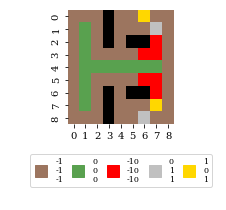

In [25]:
with plt.style.context([common.style('default'), common.style('onecol')]):
    fig = common.gridworld_cartoon((9,9))
    fig.savefig(osp.join(figs_dir, 'jungle', 'cartoon.pdf'), bbox_inches='tight')
    #plt.close(fig)

## Figures

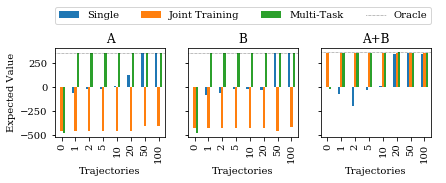

In [23]:
jungle_val = df.stack().unstack('seed').max(axis=1).unstack(-1)
jungle_val = jungle_val.rename(index={v: k for k, v in jungle_types.items()}, level=0)
jungle_val = jungle_val.xs((1000, 'value_iteration'), level=('n', 'eval'))
baseline_comparison = jungle_val.rename(columns=default_algos).loc[:, default_algos.values()]
with plt.style.context([common.style('default'), common.style('twocol')]):
    fig = common.value_multi_bar_chart(baseline_comparison, vals=jungle_types.keys(), relative='Oracle')
    fig.savefig(osp.join(figs_dir, 'jungle', 'baseline_comparison.pdf'), bbox_inches='tight')

In [9]:
baseline_comparison

Single  Joint Training  Multi-Task  Oracle
env m   type                                            
A+B 0   mean     NaN          359.70      -18.89  362.66
        se      0.00            0.00        0.00    0.00
    1   mean  -70.15          359.70      356.28  362.66
        se      0.00            0.00        0.00    0.00
    2   mean -193.88          359.70      359.14  362.66
        se      0.00            0.00        0.00    0.00
    5   mean  -26.71          359.70      356.74  362.66
        se      0.00            0.00        0.00    0.00
    10  mean   11.14          359.70      359.48  362.66
        se      0.00            0.00        0.00    0.00
    20  mean  345.33          359.70      360.96  362.66
        se      0.00            0.00        0.00    0.00
    50  mean  354.44          359.70      359.56  362.66
        se      0.00            0.00        0.00    0.00
    100 mean  345.38          359.87      359.29  362.66
        se      0.00            0.00        0.00    0.00
A   0   mean     NaN         -457.06     -475.14  357.82
        se      0.00            0.00        0.00    0.00
    1   mean  -59.50         -457.06      355.29  357.82
        se      0.00            0.00        0.00    0.00
    2   mean  -18.74         -457.06      355.29  357.82
        se      0.00            0.00        0.00    0.00
    5   mean  -21.72         -457.06      355.16  357.82
        se      0.00            0.00        0.00    0.00
    10  mean   10.83         -457.06      355.19  357.82
        se      0.00            0.00        0.00    0.00
    20  mean  123.81         -457.06      355.19  357.82
        se      0.00            0.00        0.00    0.00
    50  mean  354.95         -405.71      355.29  357.82
        se      0.00            0.00        0.00    0.00
    100 mean  355.20         -405.71      355.28  357.82
        se      0.00            0.00        0.00    0.00
B   0   mean     NaN         -422.89     -475.12  357.82
        se      0.00            0.00        0.00    0.00
    1   mean  -80.63         -422.89      355.19  357.82
        se      0.00            0.00        0.00    0.00
    2   mean  -66.08         -422.89      355.19  357.82
        se      0.00            0.00        0.00    0.00
    5   mean  -21.55         -422.89      355.28  357.82
        se      0.00            0.00        0.00    0.00
    10  mean  -24.56         -422.89      355.15  357.82
        se      0.00            0.00        0.00    0.00
    20  mean  -33.52         -422.89      355.16  357.82
        se      0.00            0.00        0.00    0.00
    50  mean  354.19         -457.19      355.30  357.82
        se      0.00            0.00        0.00    0.00
    100 mean  354.09         -412.06      355.29  357.82
        se      0.00            0.00        0.00    0.00

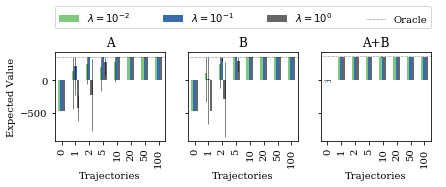

In [24]:
reg_algorithms = collections.OrderedDict([
    #('mcep reg1e-4', '$\lambda = 10^{-4}$'),
    #('mcep reg1e-3', '$\lambda = 10^{-3}$'),
    ('mcep reg1e-2', '$\lambda = 10^{-2}$'),
    ('mcep reg1e-1', '$\lambda = 10^{-1}$'),
    ('mcep reg1e0', '$\lambda = 10^0$'),
    ('value iteration', 'Oracle'),
])
jungle_val = values.rename(index={v: k for k, v in jungle_types.items()}, level=0)
jungle_val = jungle_val.xs((1000, 'value_iteration'), level=('n', 'eval'))
reg_comparison = jungle_val.rename(columns=reg_algorithms).loc[:, reg_algorithms.values()]
with plt.style.context([common.style('default'), common.style('twocol')]):
    fig = common.value_multi_bar_chart(reg_comparison, vals=jungle_types.keys(), 
                                       relative='Oracle', cmap=cm.get_cmap('Accent'))
    fig.savefig(osp.join(figs_dir, 'jungle', 'reg_comparison.pdf'), bbox_inches='tight')

## Tables

In [ ]:
ci = common.plot_ci(values, dp=1)
#ci = ci.str.replace('nan +/- nan', '---')
ci = ci.rename(index={v: k for k, v in jungle_types.items()}, level=0)
ci = ci.rename(columns=default_algos).loc[:, default_algos.values()]
ci.columns.name = 'algo'
#ci = ci.unstack('env')
#ci.columns = ci.columns.reorder_levels(['env', 'algo'])
#envs = ci.columns.levels[0]
#ci = pd.concat([ci.loc[:, [x]] for x in envs], axis=1)
ci = ci.xs((1000, 'value_iteration'), level=('n', 'eval'))
print(ci.to_latex())

In [ ]:
table_values = values.rename(columns=default_algos).loc[:, default_algos.values()]
print(common.value_latex_table(table_values, envs=['A', 'B', 'A+B'])), relative='Oracle'))

# Ad-hoc experiments

In [ ]:
fname = osp.join(experiment_dir, 'results.pkl')
data = pd.read_pickle(fname)

In [ ]:
env_name = 'pirl/GridWorld-Jungle-9x9-Soda-v0'
algo = 'mce'
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
# zeroshot = data['rewards'][algo][1000][0][env_name]
# oneshot = data['rewards'][algo][1000][1][env_name]
# myplots._gridworld_heatmap(oneshot - zeroshot, (9,9), fmt='.2f', ax=axs[0])
fiveshot = data['rewards'][algo][1000][5][env_name]
hundredshot = data['rewards'][algo][1000][100][env_name]
myplots._gridworld_heatmap(hundredshot - zeroshot, (9,9), fmt='.2f', ax=axs[1])

env = gym.make(env_name)
gt = env.unwrapped.reward
env.close()
r = data['rewards'][algo][1000]
reward_delta = {k: np.linalg.norm(v[env_name] - np.mean(v[env_name]) - gt + np.mean(gt))
                for k, v in r.items()}
reward_delta